# Machine Learning Lab 04: Multinomial Logistic Regression


## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

## Optimizing a Multinomial Regression Model

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$

Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [2]:
def phi(i, theta, X):
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta,mat_x.T))
    den = 0
    for j in range(0,k):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j,mat_x.T))
    phi_i = num/den
    return phi_i

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [3]:
def indicator(i, j):
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta):
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta,X.loc[i])
        sum = sum + (X.loc[i] * p)
    grad = -sum/m
    return grad

def gradient_descent(X, y, theta, alpha, iters):
    for iter in range(iters):
        for j in range(0, k):
            theta[j] = theta[j] - alpha * grad_cost(X, y, j, theta)
    return theta

def h(X, theta):
    X = np.matrix(X)
    h_matrix = np.empty((k,1))
    den = 0
    for j in range(0,k):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,k):
        h_matrix[i] = math.exp(np.dot(theta[i],X.T))
    h_matrix = h_matrix/den
    return h_matrix

In [4]:
data = pd.read_csv('Iris.csv')
print(data.head())

data = data.drop(['Id'],axis=1)
print(data.head())

# Extract y from data
y_label = 'Species';

y = data[y_label];

y_index = data.columns.get_loc(y_label)
# Extract features from data
X = data.iloc[:,:y_index]

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
m, n = X.shape
idx = np.arange(0,m)

# Partion data into training and testing dataset
random.shuffle(idx)
data = data.iloc[idx,:]
data = data.reset_index()
data = data.drop(['index'],axis=1)
percent_train = 0.7
m_train = int(m*percent_train)

X_train = data.iloc[0:m_train,0:y_index];
X_test = data.iloc[m_train:,0:y_index];

y_train = data.iloc[:m_train,y_index];
y_test = data.iloc[m_train:,y_index];
labels = pd.unique(data[y_label])

# Encode target labels as integers 0..k-1

i = 0
for label in y.unique():
    y_train[y_train.str.match(label)] = str(i)
    y_test[y_test.str.match(label)] = str(i)
    i = i + 1      
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [6]:

# k is the number of unique labels

k = len(y.unique())

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

theta_initial = np.ones((k, n))

alpha = .05
iterations = 200

# Logistic regression

theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations)

print(theta)

[[ 1.17771144  1.32376924  1.86059432 -0.18778083  0.44302142]
 [ 1.09541528  1.21680783  0.72409406  1.16357231  0.84676248]
 [ 0.73601596  0.50705349  0.44552391  2.0432727   1.71451074]]


In [7]:
# Predicting classes on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data

m,n = X_test.shape

y_pred = []
for index,row in X_test.iterrows():
    h_matrix = h(row, theta)
    prediction = int(np.where(h_matrix == h_matrix.max())[0])
    y_pred.append(prediction)
        
# Estimate accuracy of model on test data        

correct = (y_pred == y_test).value_counts()[True]
accuracy = correct/m
print('Accuracy: %.4f' % accuracy)


Accuracy: 0.9333


## On your own in lab

Do the following in lab:
1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


In [8]:
def J(theta, X, y, j):
    return indicator(y,j)*-np.log(phi(j, theta, X))

    
    
def grad_cost(X, y, j, theta):
    sum = np.array([0 for i in range(0,n)])
    cost = 0
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta,X.loc[i])
        cost = cost + J(theta, X.loc[i], y[i], j)
        sum = sum + (X.loc[i] * p)    
    grad = -sum/m
    return grad, cost

def gradient_descent(X, y, theta, alpha, iters):        
    cost_arr = []  
    for iter in range(iters):        
        cost = 0
        for j in range(0, k):
            grad = grad_cost(X, y, j, theta_initial)
            theta[j] = theta[j] - alpha * grad[0]
            cost = cost + grad[1]
        cost_arr.append(cost)
    return theta, cost_arr


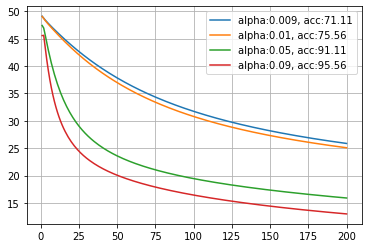

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.grid(axis='both')

alpha_arr = np.array([.009, .01, .05, .09])
iterations_arr = np.array([200, 200, 200, 200])
theta_arr = []
cost_arr = []
accuracy_arr = []


for i in range(0, len(alpha_arr)):
    theta_initial = np.ones((k, n))    
    theta, cost = gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i])
    
    y_pred = []
    for index,row in X_test.iterrows():
        h_matrix = h(row, theta)
        prediction = int(np.where(h_matrix == h_matrix.max())[0])    
        y_pred.append(prediction)        
    correct = (y_pred == y_test).value_counts()[True]
    accuracy = correct/m
    plt.plot(range(1,iterations_arr[i]+1), cost, label='alpha:'+str(alpha_arr[i]) +', acc:' + str(np.round(accuracy,4)*100))
    accuracy_arr.append(accuracy)
    
plt.legend()
plt.show()



## On your own to take home

We see that the Iris dataset is pretty easy. Depending on the train/test split, we get 97-100% accuracy.

Find a more interesting multi-class classification problem on Kaggle, clean the dataset to obtain numerical input features without missing values,
split the data into test and train, and experiment with multinomial logistic regression.

Write a brief report on your experiments and results. As always, turn in a Jupyter notebook by email
to the instructor and TA.
